In [3]:
import pandas as pd 
import re
import seaborn as sns

In [4]:
filename = "/media/riannek/minimax/gleis/filter_zeit.log"

In [5]:
filenames = []
versions = []
seconds = []

In [7]:
with open(filename) as f:

    lines = f.readlines()
    for line in lines:
        match = re.search(r"Version (\d+)", line)
        if match:
            version = match.group(1)


        match = re.search(r"(\S+laz) \((\d+\.\d+)", line)
        if match:
            filenames.append(match.group(1))
            versions.append(version)
            seconds.append(float(match.group(2)))

In [9]:
df = pd.DataFrame({"filename": filenames, "version": versions, "seconds": seconds})
df.head()

,filename,version,seconds
0,4475525_5341275.copc.laz,2,3.117538
1,4475625_5341350.copc.laz,2,0.821740
2,4478600_5350025.copc.laz,2,0.363079
3,4477225_5344825.copc.laz,2,0.018676
4,4474100_5333500.copc.laz,2,0.135815


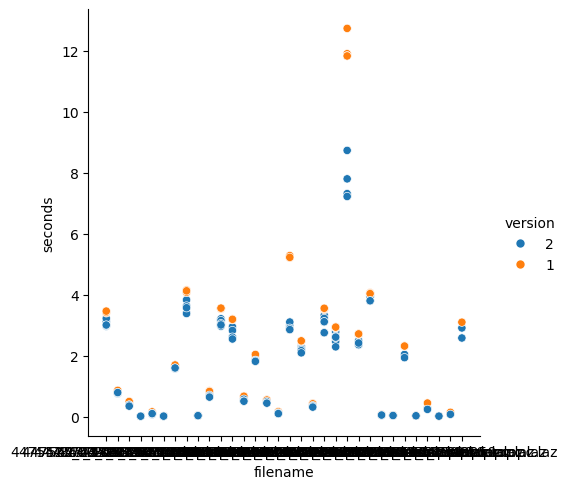

In [10]:
sns.relplot(x="filename", y="seconds", hue="version", data=df)

<Axes: xlabel='filename'>

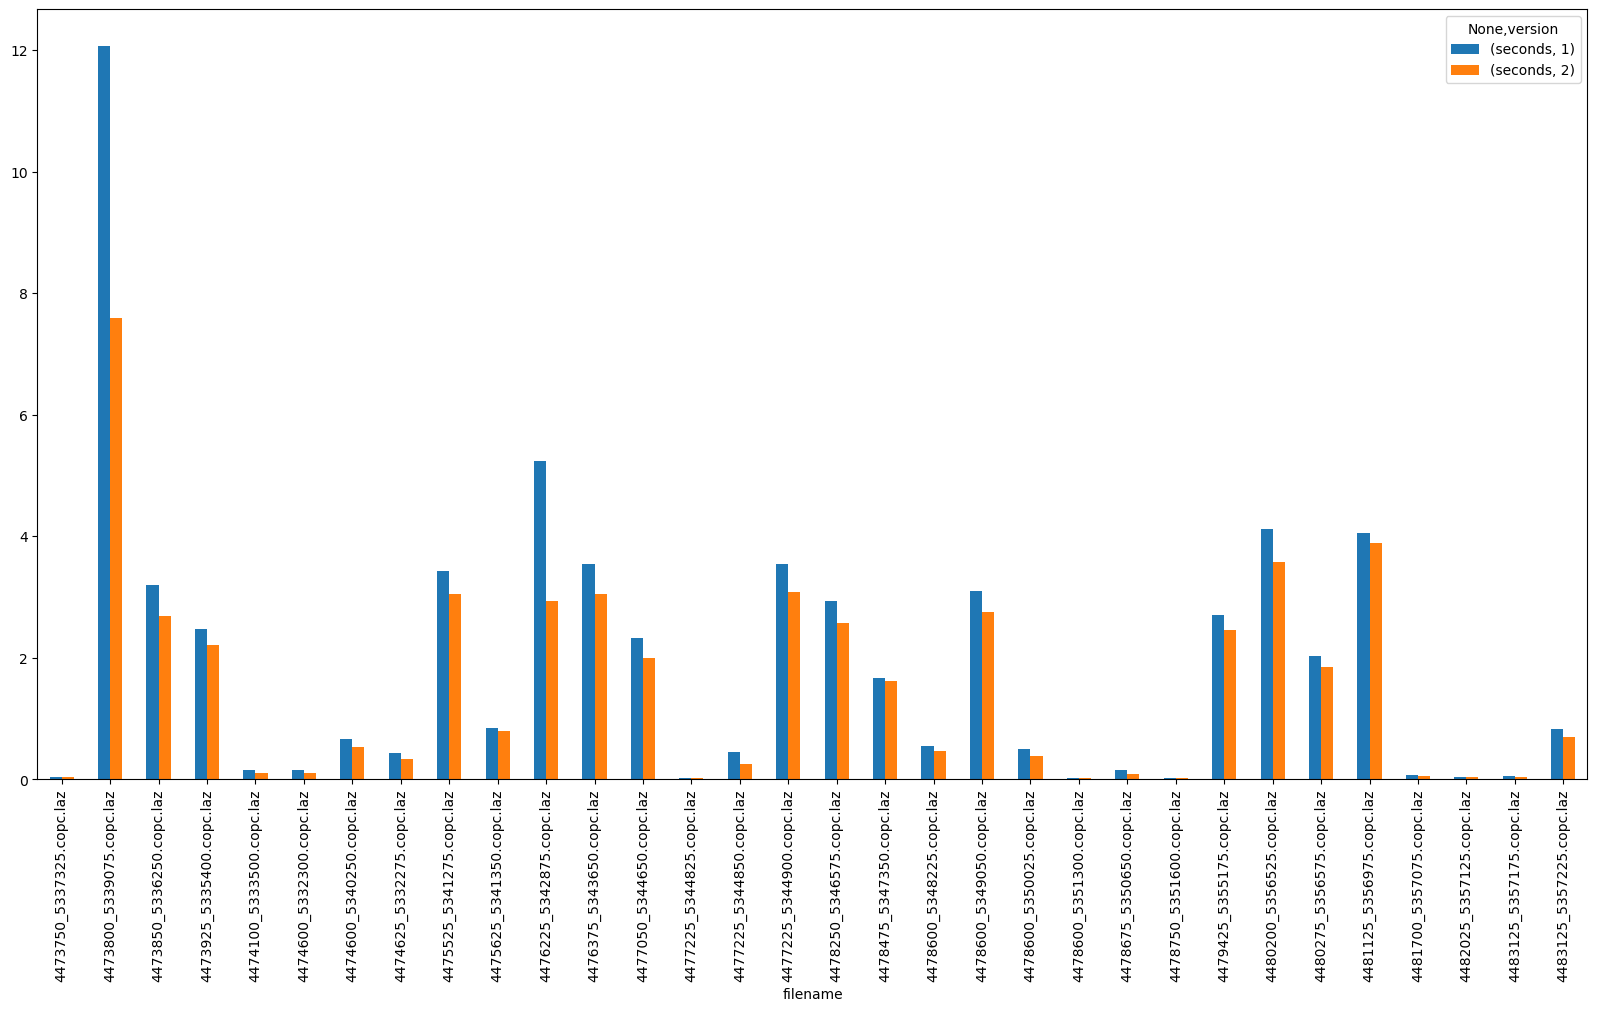

In [11]:
df.groupby(["filename", "version"]).mean().unstack().plot(kind="bar", figsize=(20,10))

In [17]:
df2 = df.groupby(["filename", "version"]).mean().unstack() 
df2["diff"] = df2[("seconds", "1")] - df2[("seconds", "2")]
df2["perc"] = df2["diff"]/ df2[("seconds", "1")] * 100

In [18]:
df2

seconds                diff       perc
version                           1         2                     
filename                                                          
4473750_5337325.copc.laz   0.033815  0.033882 -0.000067  -0.198476
4473800_5339075.copc.laz  12.069408  7.587260  4.482148  37.136440
4473850_5336250.copc.laz   3.193017  2.689533  0.503484  15.768291
4473925_5335400.copc.laz   2.480516  2.212305  0.268211  10.812694
4474100_5333500.copc.laz   0.146373  0.099856  0.046518  31.780207
4474600_5332300.copc.laz   0.158266  0.108708  0.049557  31.312790
4474600_5340250.copc.laz   0.660640  0.532677  0.127963  19.369508
4474625_5332275.copc.laz   0.427498  0.336454  0.091044  21.296920
4475525_5341275.copc.laz   3.435040  3.049546  0.385493  11.222383
4475625_5341350.copc.laz   0.850902  0.786685  0.064218   7.547021
4476225_5342875.copc.laz   5.235848  2.930885  2.304962  44.022719
4476375_5343650.copc.laz   3.534710  3.046214  0.488497  13.819987
4477050_5344650.copc.laz   2.317785  1.988628  0.329157  14.201371
4477225_5344825.copc.laz   0.019037  0.018338  0.000699   3.669912
4477225_5344850.copc.laz   0.448646  0.258589  0.190057  42.362302
4477225_5344900.copc.laz   3.547510  3.088875  0.458635  12.928360
4478250_5346575.copc.laz   2.930404  2.563257  0.367147  12.528888
4478475_5347350.copc.laz   1.666236  1.610211  0.056025   3.362367
4478600_5348225.copc.laz   0.550316  0.463015  0.087301  15.863748
4478600_5349050.copc.laz   3.098429  2.745110  0.353319  11.403166
4478600_5350025.copc.laz   0.490298  0.379179  0.111119  22.663596
4478600_5351300.copc.laz   0.019800  0.020692 -0.000892  -4.506430
4478675_5350650.copc.laz   0.144581  0.082577  0.062004  42.885589
4478750_5351600.copc.laz   0.020348  0.020131  0.000217   1.065851
4479425_5355175.copc.laz   2.709799  2.461149  0.248649   9.175935
4480200_5356525.copc.laz   4.112278  3.567193  0.545085  13.255061
4480275_5356575.copc.laz   2.022901  1.855110  0.167792   8.294608
4481125_5356975.copc.laz   4.049257  3.882996  0.166260   4.105948
4481700_5357075.copc.laz   0.066679  0.050330  0.016348  24.518272
4482025_5357125.copc.laz   0.042404  0.037422  0.004982  11.749299
4483125_5357175.copc.laz   0.046001  0.038807  0.007194  15.638848
4483125_5357225.copc.laz   0.819938  0.699416  0.120522  14.698934

In [20]:
df2["perc"].mean()

16.36737837711528